In [46]:
# Импортируем необходимые библиотеки

import numpy as np
import math
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Генерируем распределение хи-квадрат со степенями свободы k
# https://ru.wikipedia.org/wiki/Распределение_хи-квадрат

k = 50
d = chi2.rvs(k, size=1000)

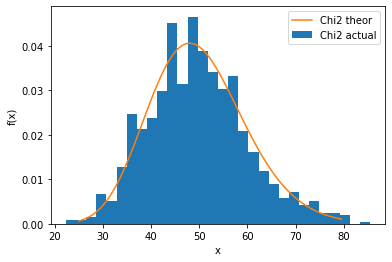

In [48]:
# Строим гистограмму выборки и рисуем поверх неё теоретическую плотность распределения

plt.hist(d, bins=30, density=True, label='Chi2 actual')

x = np.arange(25.,80.,0.5)
plt.plot(x, chi2.pdf(x, k), label='Chi2 theor')
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [50]:
# Формулы для расчёта теоретических мат. ожидания и дисперсии исходного распределения:

mu = k
var = k * 2

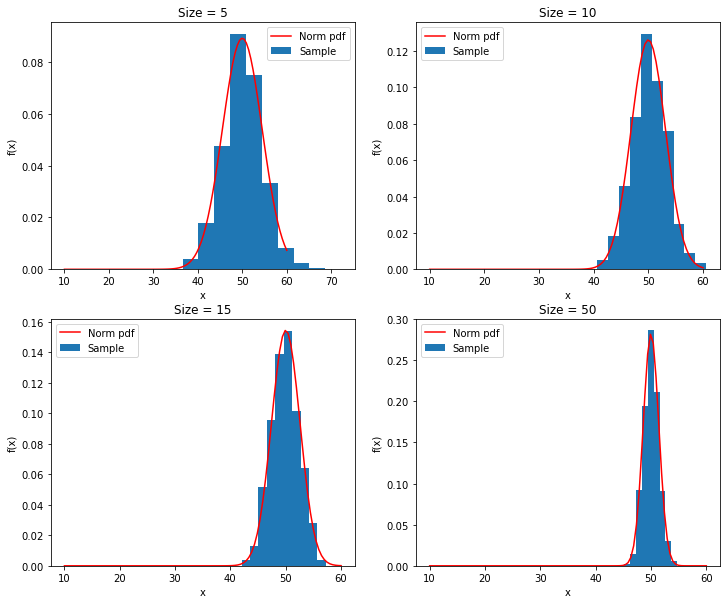

In [73]:
# Генерируем 1000 выборок объёма n (5, 10, 15, 50) и построим гистограммы распределений их выборочных средних

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

n = [5, 10, 15, 50]

for s, ax in zip(n, axs.flat):
    samples = [chi2.rvs(k, size=s) for i in np.arange(1000)]
    means = [np.mean(sample) for sample in samples]
    ax.hist(means, density=True, label='Sample')
    norm_rv = stats.norm(loc=mu, scale=math.sqrt(var/s))
    x = np.linspace(10, 60, 100)
    ax.plot(x, norm_rv.pdf(x), color='r', label = 'Norm pdf')
    ax.set(xlabel='x', ylabel='f(x)', title='Size = %d' % (s))
    ax.legend()

##### Вывод: Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы. Исходя из графиков можно сделать вывод, что с ростом n точность аппроксимации распределения выборочных средних нормальным увеличивается.